# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]


# Read the Dataset

In [2]:
df  = pd.read_csv('submission.csv')
df.head()

,calculated_total_amount
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [3]:
train= pd.read_csv('train.csv')
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [4]:
test = pd.read_csv('test.csv')
test.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


# Check dimension of the data

In [5]:
# Check dimension of the data
train.shape,test.shape

((35000, 20), (15000, 19))

Univariate analysis

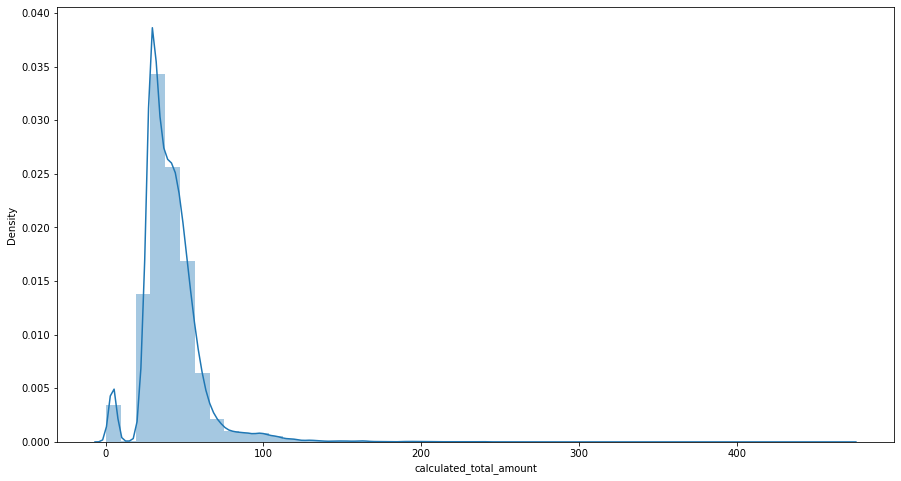

In [6]:
# Target Variable
sns.distplot(train.calculated_total_amount)
plt.show()

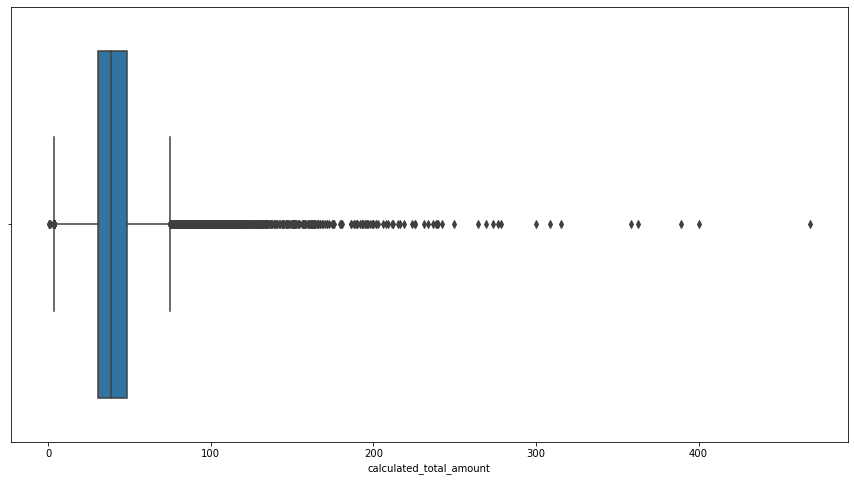

In [7]:
sns.boxplot(train.calculated_total_amount)
plt.show()

# BaseModel : Avg of the Target

In [8]:
predicted = train.calculated_total_amount.mean()
submission = pd.DataFrame({"year":test.year,
                           "calculated_total_amount":predicted})

submission.to_csv("Basemodel.csv",index=False)   #RMSE : 19.49345

In [9]:
cd

C:\Users\91771


In [10]:
ss = pd.read_csv('Basemodel.csv')
ss.shape

(15000, 2)

In [11]:
ss.columns

Index(['year', 'calculated_total_amount'], dtype='object')

In [12]:
ss.drop('year',axis=1,inplace=True)

In [13]:
ss.columns

Index(['calculated_total_amount'], dtype='object')

In [14]:
# List of numeric variables

In [15]:
train.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [16]:
cols =['trip_distance', 'fare_amount', 'extra',
        'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration',
       'calculated_total_amount']
len(cols)

9

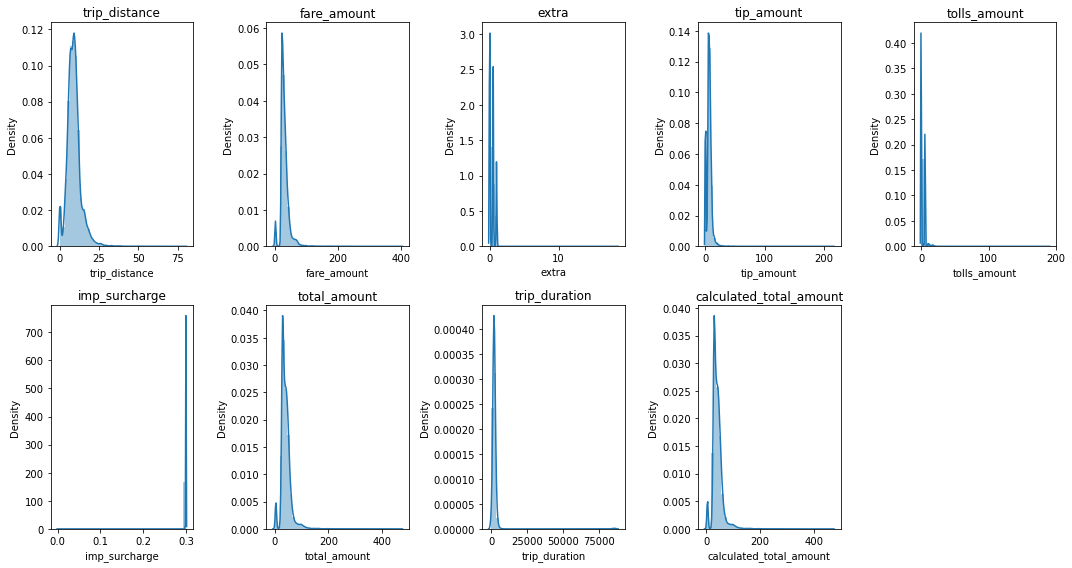

In [17]:
nrows = 2
ncols = 5
iterator = 1 
for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(train.loc[:,i])
    plt.title(i)
    iterator = iterator+1

plt.tight_layout()    
plt.show()

In [18]:
 # All the numerical variables are positively skewed except imp_surge.

In [19]:
# Statistical summary of num variables

train.loc[:,cols].describe()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,imp_surcharge,total_amount,trip_duration,calculated_total_amount
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.00000,35000.000000
mean,9.088815,31.920911,0.320337,6.142190,2.262871,0.299940,41.442469,2257.38360,41.324249
std,4.496854,14.689516,0.402590,4.397599,3.578315,0.004242,19.241543,5112.41526,19.167043
min,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.310000,1.00000,0.310000
25%,6.470000,24.000000,0.000000,4.460000,0.000000,0.300000,30.350000,1448.00000,30.300000
50%,8.700000,29.000000,0.000000,6.050000,0.000000,0.300000,38.470000,1862.00000,38.460000
75%,10.990000,36.000000,0.500000,8.100000,5.760000,0.300000,48.352500,2340.00000,48.200000
max,79.010000,400.000000,18.500000,215.000000,189.500000,0.300000,468.350000,86347.00000,468.350000


In [20]:
# total amount > calculated total_amount ... count
train.loc[train.total_amount>train.calculated_total_amount,].shape

(17601, 20)

In [21]:
# total amount == calculated total_amount ... count
train.loc[train.total_amount==train.calculated_total_amount,].shape

(17, 20)

In [22]:
# total amount < calculated total_amount ... count
train.loc[train.total_amount<train.calculated_total_amount,].shape

(17382, 20)

# NOTE FOR FEATURE ENGINEERING
Create a new variable on the basis of total amount and calculated total amount

In [23]:
# combine train and test

combined = pd.concat([train,test],ignore_index=True)

In [24]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [25]:
combined.tail()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
49995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0,NaN
49996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0,NaN
49997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0,NaN
49998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0,NaN
49999,9.25,1,N,1,27.0,0.0,0.5,5.03,5.76,0.3,38.59,138,107,2018,9,23,6,10,2444.0,NaN


# Univariate analysis of Categorical Variable

In [26]:
#
combined.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [27]:
#
cols_cat =['store_and_fwd_flag','rate_code','payment_type',
           'mta_tax','year','month']
len(cols_cat)

6

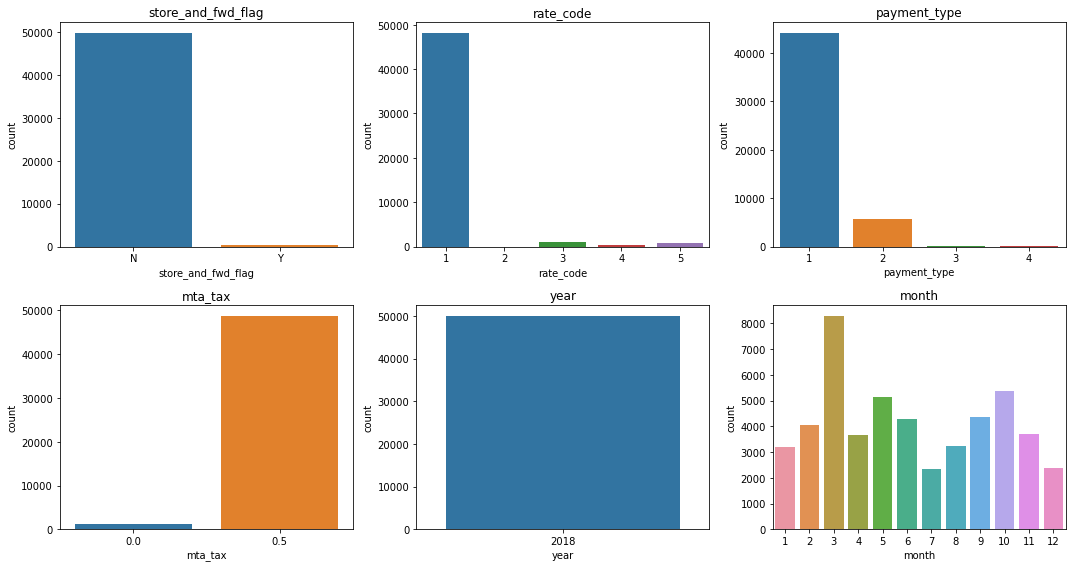

In [28]:
#
nrows = 2
ncols = 3
iterator = 1 
for i in cols_cat:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator = iterator+1

plt.tight_layout()    
plt.show()

In [29]:
# BIVARIATE ANALYSIS

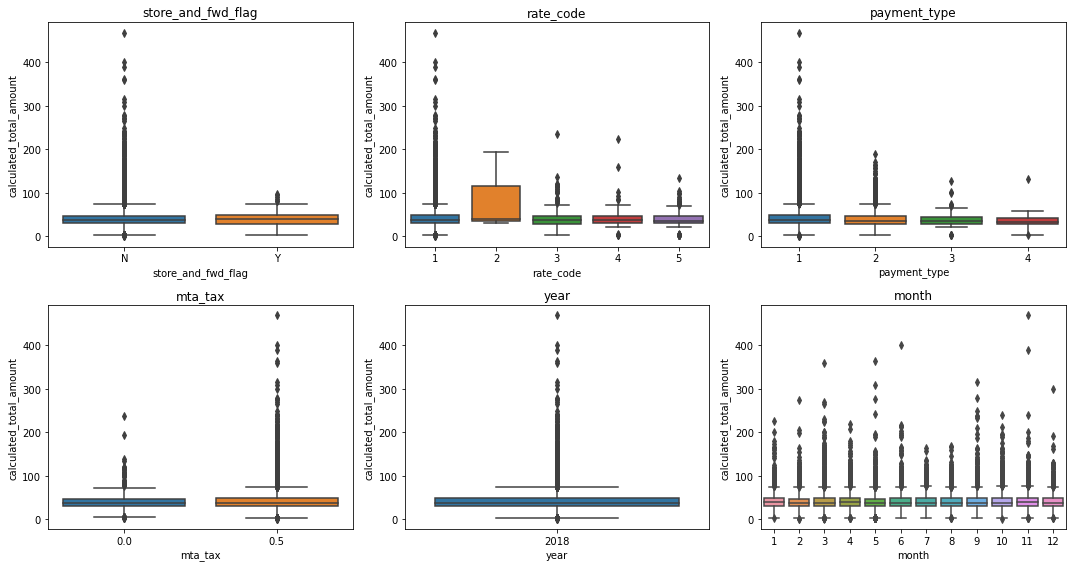

In [30]:
# CAT VS NUM
cols_cat =['store_and_fwd_flag','rate_code','payment_type',
           'mta_tax','year','month']

#
nrows = 2
ncols = 3
iterator = 1 
for i in cols_cat:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x = combined.loc[:,i],y=combined.calculated_total_amount)
    plt.title(i)
    iterator = iterator+1

plt.tight_layout()    
plt.show()

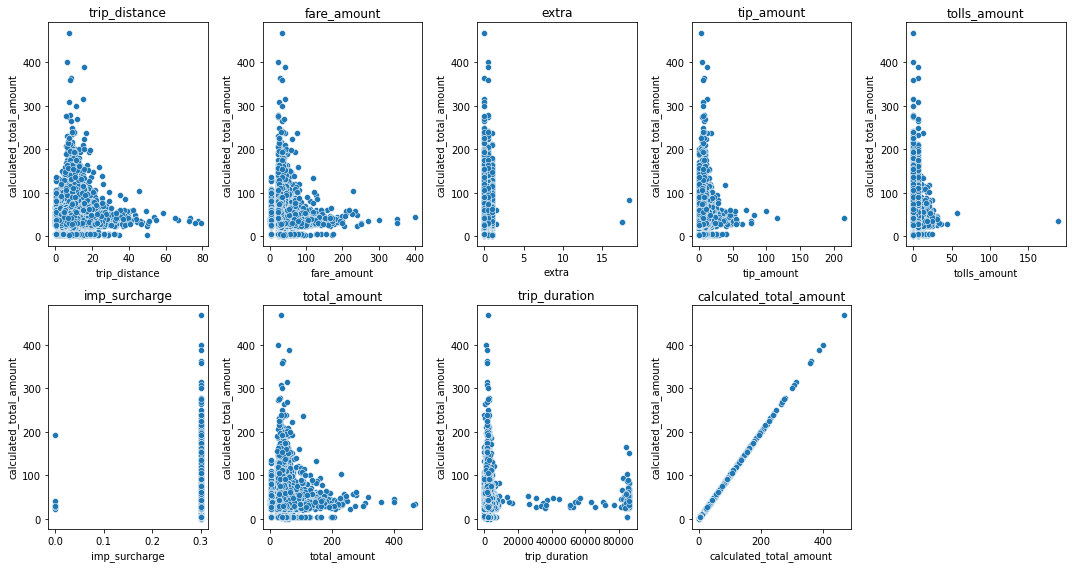

In [31]:
# NUM VS NUM #
nrows = 2
ncols = 5
iterator = 1 
for i in cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x = combined.loc[:,i],y=combined.calculated_total_amount)
    plt.title(i)
    iterator = iterator+1

plt.tight_layout()    
plt.show()

<AxesSubplot:>

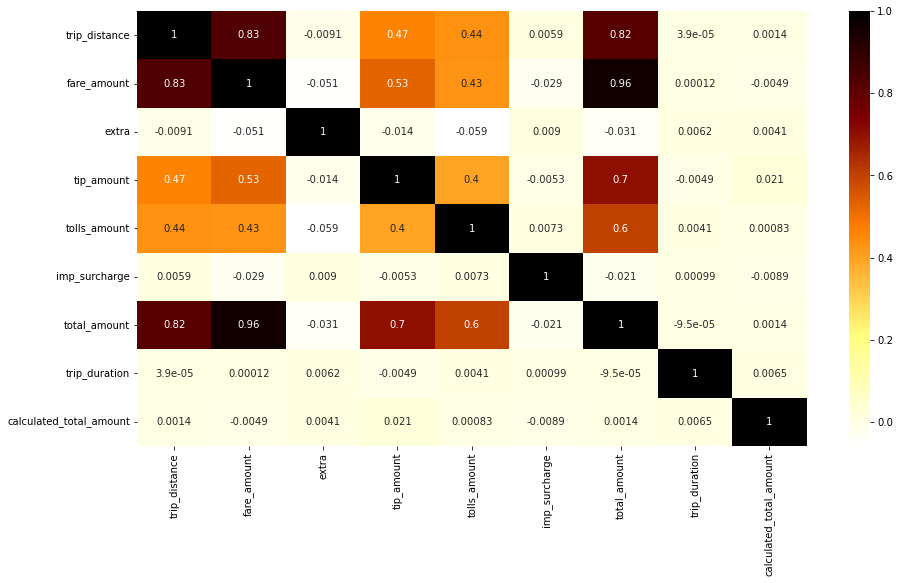

In [32]:
# Heatmap ......
sns.heatmap(combined.loc[:,cols].corr(),annot=True,cmap='afmhot_r')

In [33]:
cols

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'imp_surcharge',
 'total_amount',
 'trip_duration',
 'calculated_total_amount']

In [34]:
# statistical test to verify which columns are important
#teststats,pvalue = stats.mannwhitneyu(train.loc[:,i],
                                       #train.calculated_total_amount)

#H0 : the feature is not a significant var for target
#H1 : the feature is a significant var for target
    
import scipy.stats as stats

for i in cols:
    teststats,pvalue = stats.ttest_ind(train.loc[:,i],
                                       train.calculated_total_amount)
    print("pvalue for",i,"var is",np.round(pvalue,6))

pvalue for trip_distance var is 0.0
pvalue for fare_amount var is 0.0
pvalue for extra var is 0.0
pvalue for tip_amount var is 0.0
pvalue for tolls_amount var is 0.0
pvalue for imp_surcharge var is 0.0
pvalue for total_amount var is 0.415445
pvalue for trip_duration var is 0.0
pvalue for calculated_total_amount var is 1.0


In [35]:
# OUTLIER TREATMENT
q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)
iqr = q3-q1
ul = q3+1.5*(iqr)
ll = q1-1.5*(iqr)


In [36]:
wt_outliers = combined

In [37]:
wt_outliers.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4


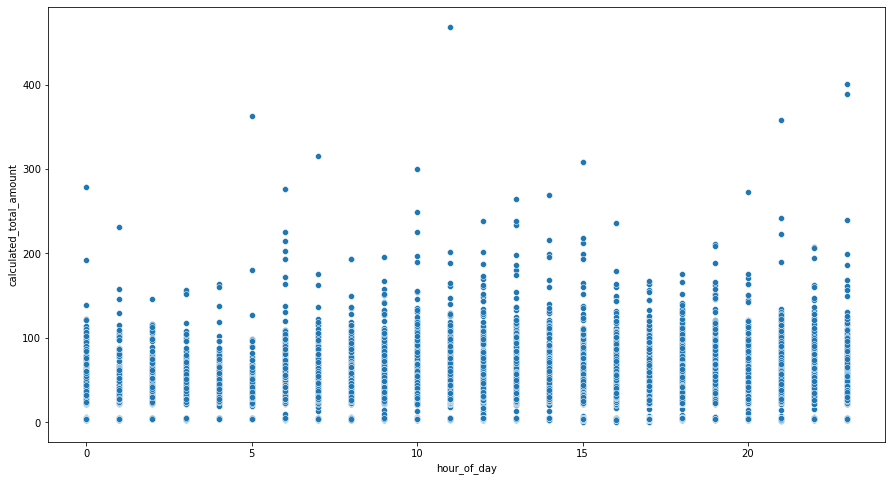

In [38]:
sns.scatterplot(x=wt_outliers.hour_of_day,y=wt_outliers.calculated_total_amount)
plt.show()

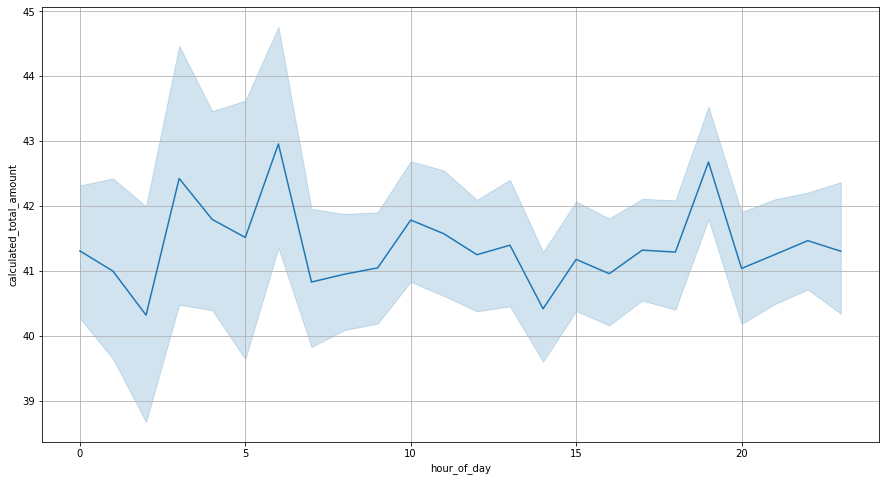

In [39]:
sns.lineplot(wt_outliers.hour_of_day,wt_outliers.calculated_total_amount)
plt.grid()
plt.show()

In [40]:
# BUSY HOURS -  10,15,16,17,18,19,20 :: busy hour......
# Rush Hours : 1 and 0

In [41]:
wt_outliers.hour_of_day.unique()

array([ 6, 10,  8, 20, 21,  7,  2,  3, 18, 12, 16, 15, 11, 17, 19, 22, 14,
        0,  4,  5,  9, 13, 23,  1], dtype=int64)

In [42]:
wt_outliers.loc[:,['hour_of_day','calculated_total_amount']].describe()

,hour_of_day,calculated_total_amount
count,50000.000000,35000.000000
mean,13.814780,41.324249
std,6.222891,19.167043
min,0.000000,0.310000
25%,10.000000,30.300000
50%,14.000000,38.460000
75%,19.000000,48.200000
max,23.000000,468.350000


In [43]:
wt_outliers["rush_hour"]=wt_outliers.hour_of_day.apply(lambda x:1 if x in [10,15,16,17,18,19,20] else 0)

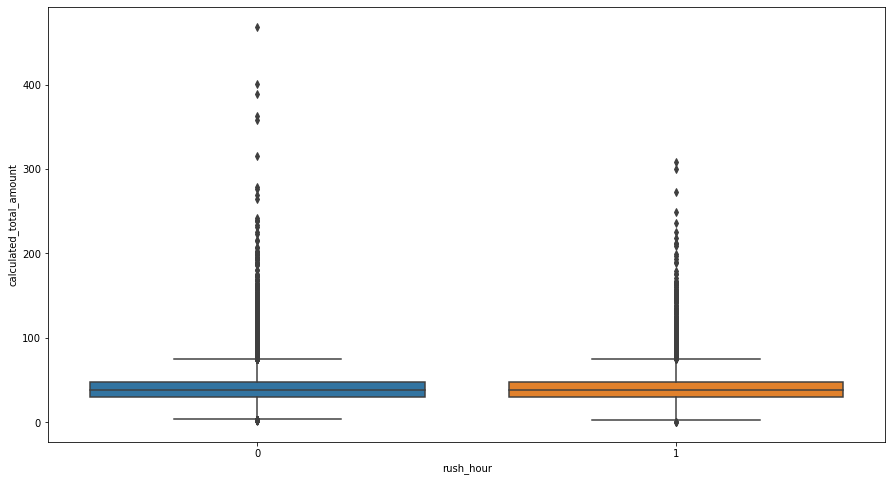

In [44]:
sns.boxplot(x ='rush_hour',y='calculated_total_amount',data=wt_outliers)
plt.show()

In [45]:
wt_outliers["target_diff"] = wt_outliers["total_amount"] - wt_outliers['calculated_total_amount']

def difference(x):
    if x>0:
        return('Discount')
    elif(x==0):
        return('Equal')
    else:
        return('Excess')


In [46]:
wt_outliers['target_diff_cat']=wt_outliers.target_diff.apply(difference)

In [47]:
# Day wise avg revenue

wt_outliers.groupby('day_of_week')['calculated_total_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
0,4654.0,41.672660,19.231342,2.80,30.350,38.76,48.67,278.78
1,5540.0,41.284208,20.902749,0.90,30.075,38.29,48.06,468.35
2,5498.0,41.230764,19.063380,0.31,30.300,38.15,48.07,276.38
3,5584.0,40.817104,16.980414,3.30,30.350,38.30,48.16,207.80
4,5307.0,41.330584,19.191978,0.31,30.300,38.30,48.35,264.30
5,4036.0,41.552272,19.576463,3.30,30.360,38.76,48.07,315.38
6,4381.0,41.550742,19.149052,1.30,30.350,38.50,48.36,389.12


In [48]:
# as we see there is no specific pattern between the days and amount
# we will apply clustering technique to generate the cluster labels

In [49]:
wt_outliers.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'target_diff', 'target_diff_cat'],
      dtype='object')

In [50]:
#find the cluster count for day,day_of_week,month,hour_of_day

In [51]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
elbow = KElbowVisualizer(estimator=kmeans,random_state=0)

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=10, random_state=0))

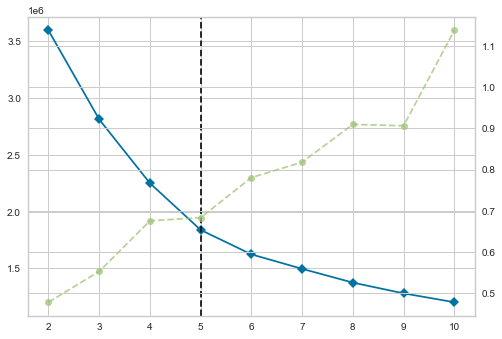

In [52]:
cluster_data = wt_outliers.loc[:,['month','day','day_of_week','hour_of_day']]
elbow.fit(cluster_data)

In [53]:
# use 5 clusters to generate the labels

kmeans = KMeans(n_clusters=5,random_state=0)
cluster_data = wt_outliers.loc[:,['month','day','day_of_week','hour_of_day']]


labels = kmeans.fit(cluster_data)
wt_outliers['cluster_labels']=labels.labels_

In [54]:
wt_outliers.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,...,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,target_diff,target_diff_cat,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,...,3,7,2,6,2131.0,24.30,0,16.40,Discount,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,...,2,25,6,10,2377.0,37.40,1,-32.85,Excess,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,...,1,29,0,8,1286.0,30.36,0,27.31,Discount,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,...,9,25,1,20,2586.0,4.30,1,42.01,Discount,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,...,8,20,0,21,1575.0,23.80,0,3.56,Discount,1


In [55]:
wt_outliers.describe()

,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,...,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,rush_hour,target_diff,cluster_labels
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.0,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,35000.000000,50000.000000,35000.000000,50000.000000
mean,9.093300,1.10710,1.123720,31.896397,0.320838,0.486960,6.144731,2.259124,0.299934,41.417478,...,2018.0,6.12992,15.309240,2.882520,13.814780,2250.550020,41.324249,0.369700,0.118221,1.977340
std,4.491785,0.57243,0.350051,14.632630,0.407761,0.079687,4.436417,3.537413,0.004449,19.232173,...,0.0,3.33669,8.685061,1.925064,6.222891,5033.290248,19.167043,0.482728,27.139829,1.361904
min,0.010000,1.00000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,...,2018.0,1.00000,1.000000,0.000000,0.000000,1.000000,0.310000,0.000000,-431.750000,0.000000
25%,6.490000,1.00000,1.000000,24.000000,0.000000,0.500000,4.460000,0.000000,0.300000,30.350000,...,2018.0,3.00000,7.000000,1.000000,10.000000,1452.000000,30.300000,0.000000,-12.450000,1.000000
50%,8.710000,1.00000,1.000000,29.000000,0.000000,0.500000,6.050000,0.000000,0.300000,38.470000,...,2018.0,6.00000,16.000000,3.000000,14.000000,1863.000000,38.460000,0.000000,0.100000,2.000000
75%,10.972500,1.00000,1.000000,36.000000,0.500000,0.500000,8.080000,5.760000,0.300000,48.300000,...,2018.0,9.00000,23.000000,4.000000,19.000000,2345.000000,48.200000,1.000000,12.610000,3.000000
max,79.010000,5.00000,4.000000,400.000000,18.500000,0.500000,215.000000,189.500000,0.300000,468.350000,...,2018.0,12.00000,31.000000,6.000000,23.000000,86347.000000,468.350000,1.000000,434.400000,4.000000


In [56]:
# Drop the insignificant variables....


new = wt_outliers.drop(['imp_surcharge','year','month','day',
                        'day_of_week','hour_of_day','dropoff_location_id',
                        'pickup_location_id'],axis=1)

In [57]:
new.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,target_diff,target_diff_cat,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,16.40,Discount,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,4.55,2377.0,37.40,1,-32.85,Excess,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,27.31,Discount,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,42.01,Discount,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,3.56,Discount,1


In [58]:
# split the data in Train and Test

train.shape,test.shape,new.shape

((35000, 20), (15000, 19), (50000, 16))

In [59]:
newtrain=new.loc[0:train.shape[0]-1,:]
newtest= new.loc[train.shape[0]:,:]

In [60]:
newtrain.shape,newtest.shape

((35000, 16), (15000, 16))

In [61]:
newtest.head(1)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,target_diff,target_diff_cat,cluster_labels
35000,15.7,1,N,2,45.0,0.0,0.5,0.0,0.0,45.8,3967.0,NaN,1,NaN,Excess,1


In [62]:
newtrain.drop(['target_diff','target_diff_cat'],axis=1,inplace=True)
newtest.drop(['calculated_total_amount','target_diff','target_diff_cat'],axis=1,inplace=True)

In [63]:
newtrain.shape,newtest.shape

((35000, 14), (15000, 13))

In [64]:
# Outlier from Train Data
# Apply Statistical Analysis
# Models ~ LinearRegression, Ridge,Lasso and Random Forest, GBM,XGBOOST
# Stacking Model ~ LightGBM & Standalone Lightgbm...

In [65]:
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
final = newtrain.loc[~((newtrain<ll)|(newtrain>ul)).any(axis=1)]
final.shape

(25047, 14)

In [66]:
final.select_dtypes(include=np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'trip_duration', 'calculated_total_amount', 'rush_hour',
       'cluster_labels'],
      dtype='object')

In [67]:
final.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration', 'calculated_total_amount', 'rush_hour',
       'cluster_labels'],
      dtype='object')

In [68]:
newtest.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'trip_duration', 'rush_hour', 'cluster_labels'],
      dtype='object')

In [69]:
cat_cols = ['rate_code','payment_type',
           'mta_tax','store_and_fwd_flag','rush_hour']

In [70]:
# Anova for payment type

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [71]:
model = sfa.ols("calculated_total_amount~rush_hour",data = final).fit()

print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
rush_hour      1.0  5.616087e+02  561.608695  3.708571  0.054145
Residual   25045.0  3.792698e+06  151.435318       NaN       NaN


In [72]:
final.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration,calculated_total_amount,rush_hour,cluster_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,40.70,2131.0,24.30,0,0
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,57.67,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,46.31,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,27.36,1575.0,23.80,0,1
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,48.08,2029.0,30.95,0,0


In [73]:
final.drop(['store_and_fwd_flag','mta_tax'],axis=1,inplace=True)

In [76]:
newtrain.drop(['store_and_fwd_flag','mta_tax'],axis=1,inplace=True)
newtest.drop(['store_and_fwd_flag','mta_tax'],axis=1,inplace=True)

In [87]:
!pip install lightgbm

In [88]:
# Modeling

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import KFold

kfold = KFold(n_splits =5, shuffle =True,random_state=0)

#split the Train Data in X and y
X = final.drop('calculated_total_amount',axis=1)
y = final.calculated_total_amount


pred=[]
#lr = RandomForestRegressor()

from lightgbm import LGBMRegressor
lr = LGBMRegressor()
for train_index,test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest))

In [89]:
# Generate the Final Output..

output = pd.DataFrame(pred).T.mean(axis=1)

submission = pd.DataFrame({'calculated_total_amount':output})
submission.to_csv('LGBmodel.csv',index=False)

In [79]:
cd

C:\Users\91771


In [90]:
# StackingModel

from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

basemodels =[('lr',LinearRegression()),('rf',RandomForestRegressor()),
            ('gbm',GradientBoostingRegressor()),('lasso',Lasso())]

finalmodel = XGBRegressor()

stack = StackingRegressor(estimators=basemodels,final_estimator=finalmodel,
                         cv=KFold(n_splits= 5,shuffle=True,random_state=0))

pred=[]

for train_index,test_index in kfold.split(X,y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest))


In [91]:
# Generate the Final Output..

output = pd.DataFrame(pred).T.mean(axis=1)

submission = pd.DataFrame({'calculated_total_amount':output})
submission.to_csv('Stackmodel.csv',index=False)